## Split the data into training and testing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# load the dataset
df = pd.read_csv("../../data/engineered_copd_data.csv")

In [4]:
# define the features and the target variable
X, y = df.drop(columns=["COPD_Diagnosis"]), df["COPD_Diagnosis"]

In [5]:
# split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training
- Based on the data, it is a binary classification problem set as we are prediction if someone has COPD or not, hence we are going to use following models:
    - Logistic Regression
    - Decision Trees
    - Random Forest

In [6]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [7]:
# initialize the model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [8]:
# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Save the models
    with open(f"../../models/{name.replace(' ', '_')}.pkl", "wb") as file:
        pickle.dump(model, file)
    
    print(f"{name} model trained and saved")

print("Model training completed")

Logistic Regression model trained and saved
Decision Tree model trained and saved
Random Forest model trained and saved
Model training completed


## Evaluate the models
- Accuracy, Precision, Recall ,F1 score and confusion matrix plot

In [9]:
# Function to print and plot confusion matrix
def print_and_plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


Logistic Regression Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       186
           1       0.99      1.00      1.00       214

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400


Confusion Matrix:
[[184   2]
 [  0 214]]


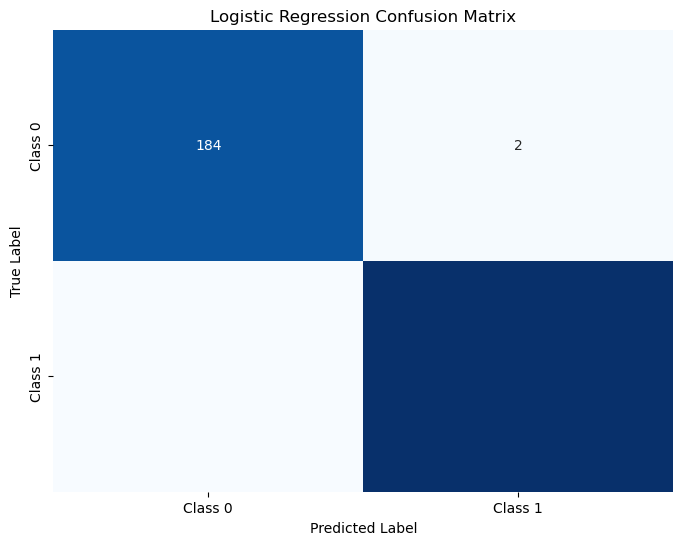


Decision Tree Evaluation: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.99      0.98      0.98       214

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
[[183   3]
 [  4 210]]


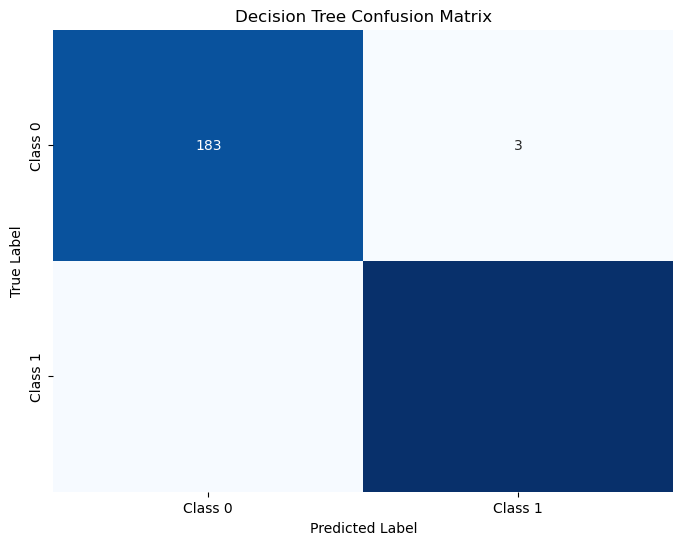


Random Forest Evaluation: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       186
           1       0.99      1.00      1.00       214

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400


Confusion Matrix:
[[184   2]
 [  0 214]]


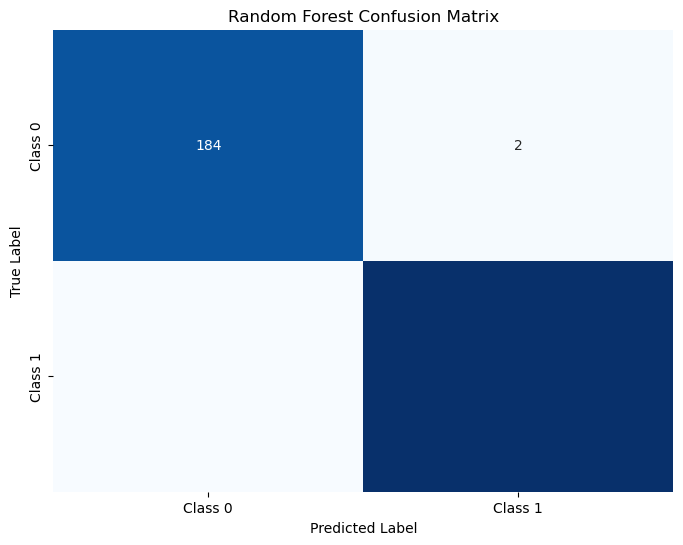

In [10]:
# Evaluate models and print/plot confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation: ")
    print(classification_report(y_test, y_pred))

    # Print and plot confusion matrix
    print_and_plot_confusion_matrix(y_test, y_pred, f"{name} Confusion Matrix")

## Model refinement

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# define the parameter grid for random forest
params_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

In [13]:
# Innitiliaze the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_grid, cv = 5, n_jobs = -1, scoring="accuracy")

In [14]:
# fit the grid search cv
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:
# best parameters
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [16]:
# Save the best model
with open("../../models/best_random_forest_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Model refinement completed and best model saved")

Model refinement completed and best model saved
